# Hardworks Pays Off

#### Since dataset is big , therefore we will use minibatch method.

In [21]:
#Here importing all necessary libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [22]:
#Reading the datasets
X = pd.read_csv('Linear_X_Train.csv')
Y = pd.read_csv("Linear_Y_Train.csv")
X_Test = pd.read_csv("Linear_X_Test.csv")

In [23]:
#Converting Dataframes into numpy arrays
X = np.array(X)
Y = np.array(Y)
X = (X-X.mean())/X.std()   #Normalizing the data here.
X_Test = np.array(X_Test)

In [24]:
#Creating hypothesis function according the rule which will return the value of Y_Predicted
def hypothesis(x,theta):
    return(theta[0] + theta[1] * x)

In [25]:
"""Creating a function which will take the value of X and theta(already calculated) and will return an array...
...containing the predicted values according to given X and theta."""
def prediction(X,theta):
    m = X.shape[0]
    Y_Predicted = []
    for i in range(m):
        y = hypothesis(X[i],theta)
        Y_Predicted.append(y)
    Y_Predicted = np.array(Y_Predicted)
    return(Y_Predicted)

In [26]:
"""Creating an error fucntion here according to the formula and returning the same.
We have created it to get the error value so we can save them in a list in order to plot the error graph."""
def get_error(X,Y,theta):
    error = 0
    m = X.shape[0]
    for i in range(m):
        hx = hypothesis(X[i],theta)
        error += (hx-Y[i])**2
    return(error)

In [27]:
"""Since the dataset is big, so we are using the minibatch method. Taking the batch size=30 and then...
...creating random examples of the batch size"""
def batch_gradient(X,Y,theta,batch_size=30):
    m=X.shape[0]
    random_examples=np.arange(m)                  #creates an array [0,1,2,.....,m-1]
    np.random.shuffle(random_examples)            #this shuffles the values of array, e.g [1763,2080,22,78,823,...]
    random_examples=random_examples[:batch_size]  #This creates an array of batch size containing random indexes
    grad=np.zeros((2,))                           #creating gradient array and intializing it to zero
    for i in random_examples:
        hx = hypothesis(X[i],theta)
        grad[0] += (hx-Y[i])                        #finding gradients according the formula
        grad[1] += (hx-Y[i])*X[i]
    return(grad)

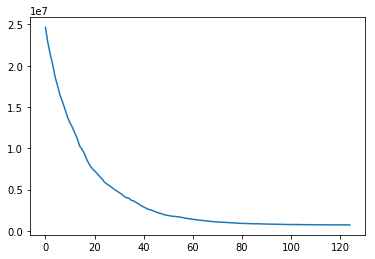

Values of intercept and slope are  0.9727312942552918 78.1746232890397  respectively.
[[-145.83486583]
 [ -66.96351136]
 [-196.8233266 ]
 ...
 [  10.97969449]
 [ -20.76275254]
 [ -52.21927025]]


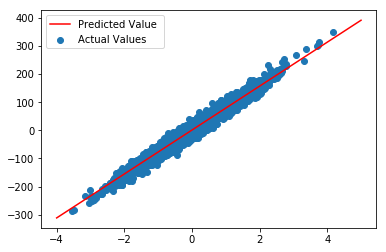

In [28]:
#Creating main driver program    
def minibatch_gradient_descent(X,Y,batch_size=30,learning_rate=0.001):
    theta = np.zeros((2,))
    error_values = []
    batches = int(X.shape[0]/batch_size)            #defining total number of batches here.
    for i in range(batches):
        grad = batch_gradient(X,Y,theta,batch_size=30)
        error = get_error(X,Y,theta)          
        error_values.append(error)                #appending the error values so that it can be used for error plot
        theta[0] -= learning_rate*grad[0]           #here updating the values of theta according to gradient descent method.
        theta[1] -= learning_rate*grad[1]
    return(theta,error_values)
    
theta,error_values = minibatch_gradient_descent(X,Y,30,0.001)
plt.plot(error_values)                           #Plotting the error values
plt.show()
print("Values of intercept and slope are ",theta[0],theta[1]," respectively.")
plt.scatter(X,Y,label="Actual Values ")          #Plotting the X and Y by scatter method
xt = np.arange(-4,6)                               
#Creating some Xtest values in order to plot a line over the scatter plot to see how efficient our graph is.
plt.plot(xt,hypothesis(xt,theta),color='r',label="Predicted Value ") 
#Plotting the Line by predicting the values according to given and derived thetas.
plt.legend() 
Y_Predicted_Values = prediction(X_Test,theta)      
#Prediciting the values of Y according given X_Test Values and saving them into an array
print(Y_Predicted_Values)